In [1]:
#training.py
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

2023-10-10 17:06:22.770689: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-10 17:06:22.813738: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-10 17:06:22.814184: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 17:06:23.602573: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])  

In [ ]:
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2618 - accuracy: 0.9323
Epoch 2/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2593 - accuracy: 0.9320
Epoch 3/1000
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2523 - accuracy: 0.9334
Epoch 4/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2535 - accuracy: 0.9346
Epoch 5/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2467 - accuracy: 0.9356
Epoch 6/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2434 - accuracy: 0.9362
Epoch 7/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2445 - accuracy: 0.9361
Epoch 8/1000
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2413 - accuracy: 0.9361
Epoch 9/1000
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2413 - accuracy: 0.9374
Epoch 10/1000
1875/1875 [==============================] - 3s 1m

313/313 [==============================] - 0s 961us/step


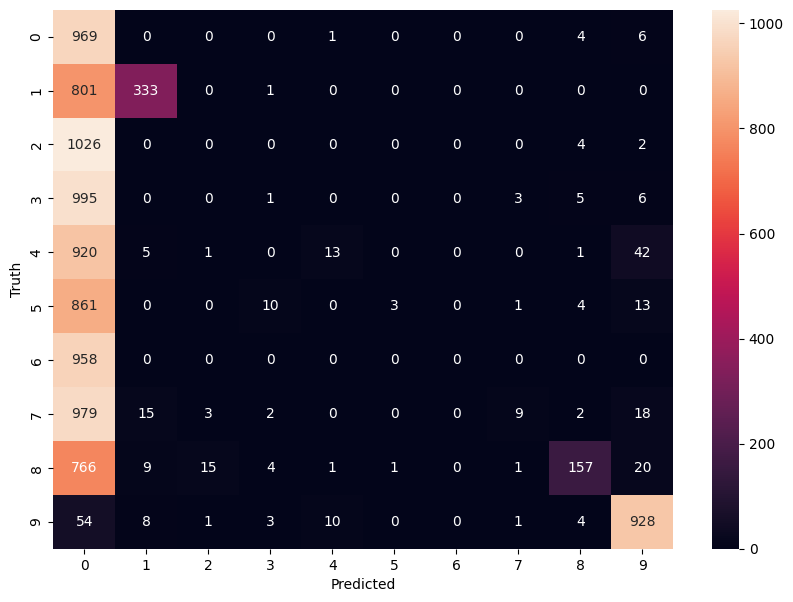

In [7]:
predicted = model.predict(X_test)
predicted_labels = [np.argmax(i) for i in predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

model.save('writing.keras')

In [6]:
model.save('writing.keras')